In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Clustering.csv", index_col=0)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [3]:
df["Attrition_Flag"].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [4]:
df["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [5]:
df["Education_Level"].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [6]:
df["Card_Category"].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

# 1.a) Converting ordinal categories into integers

In [7]:
attrition_mapper = {'Existing Customer': 1, 'Attrited Customer': 0}
df["Attrition_Flag"] = df["Attrition_Flag"].replace(attrition_mapper)

income_mapper = {'$60K - $80K': 3, 'Less than $40K': 1, '$80K - $120K': 4, '$40K - $60K': 2, '$120K +': 5, 'Unknown': 0}
df["Income_Category"] = df["Income_Category"].replace(income_mapper)

education_mapper = {'High School': 2, 'Graduate': 4, 'Uneducated': 1, 'Unknown': 0, 'College': 3, 'Post-Graduate': 5, 'Doctorate': 6}
df["Education_Level"] = df["Education_Level"].replace(education_mapper)

card_mapper = {'Blue': 0, 'Gold': 2, 'Silver': 1, 'Platinum': 3}
df["Card_Category"] = df["Card_Category"].replace(card_mapper)

df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,1,45,M,3,2,Married,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,1,49,F,5,4,Single,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,1,51,M,3,4,Married,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,1,40,F,4,2,Unknown,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,1,40,M,3,1,Married,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772366833,1,50,M,2,4,Single,2,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
710638233,0,41,M,2,0,Divorced,2,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
716506083,0,44,F,1,2,Married,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


# 1.b) Converting columns to dummies

In [8]:
df = pd.get_dummies(df, columns = ["Gender", "Marital_Status"])
df

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,1,45,3,2,3,0,39,5,1,3,...,1144,42,1.625,0.061,0,1,0,1,0,0
818770008,1,49,5,4,1,0,44,6,1,2,...,1291,33,3.714,0.105,1,0,0,0,1,0
713982108,1,51,3,4,4,0,36,4,1,0,...,1887,20,2.333,0.000,0,1,0,1,0,0
769911858,1,40,4,2,1,0,34,3,4,1,...,1171,20,2.333,0.760,1,0,0,0,0,1
709106358,1,40,3,1,3,0,21,5,1,0,...,816,28,2.500,0.000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772366833,1,50,2,4,2,0,40,3,2,3,...,15476,117,0.857,0.462,0,1,0,0,1,0
710638233,0,41,2,0,2,0,25,4,2,3,...,8764,69,0.683,0.511,0,1,1,0,0,0
716506083,0,44,1,2,1,0,36,5,3,4,...,10291,60,0.818,0.000,1,0,0,1,0,0


In [9]:
# For avodiding the dummy trap, one of the columns of each category will be dropped. 
df.drop(["Gender_M", "Marital_Status_Unknown"], axis = 1, inplace = True)
df

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,1,45,3,2,3,0,39,5,1,3,...,11914.0,1.335,1144,42,1.625,0.061,0,0,1,0
818770008,1,49,5,4,1,0,44,6,1,2,...,7392.0,1.541,1291,33,3.714,0.105,1,0,0,1
713982108,1,51,3,4,4,0,36,4,1,0,...,3418.0,2.594,1887,20,2.333,0.000,0,0,1,0
769911858,1,40,4,2,1,0,34,3,4,1,...,796.0,1.405,1171,20,2.333,0.760,1,0,0,0
709106358,1,40,3,1,3,0,21,5,1,0,...,4716.0,2.175,816,28,2.500,0.000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772366833,1,50,2,4,2,0,40,3,2,3,...,2152.0,0.703,15476,117,0.857,0.462,0,0,0,1
710638233,0,41,2,0,2,0,25,4,2,3,...,2091.0,0.804,8764,69,0.683,0.511,0,1,0,0
716506083,0,44,1,2,1,0,36,5,3,4,...,5409.0,0.819,10291,60,0.818,0.000,1,0,1,0


# 1.c) Scaling the data

In [10]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
df_scaled =pd.DataFrame(data_scaled, columns = df.columns)

# 2) Finding k value

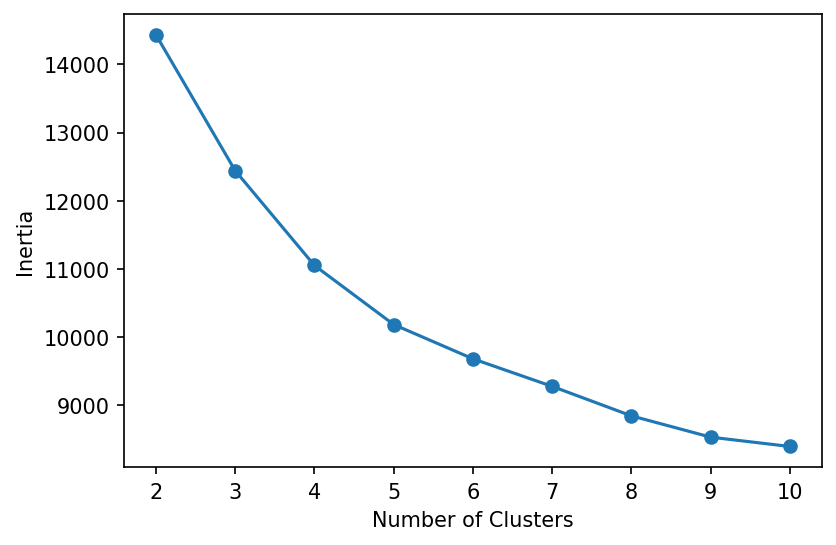

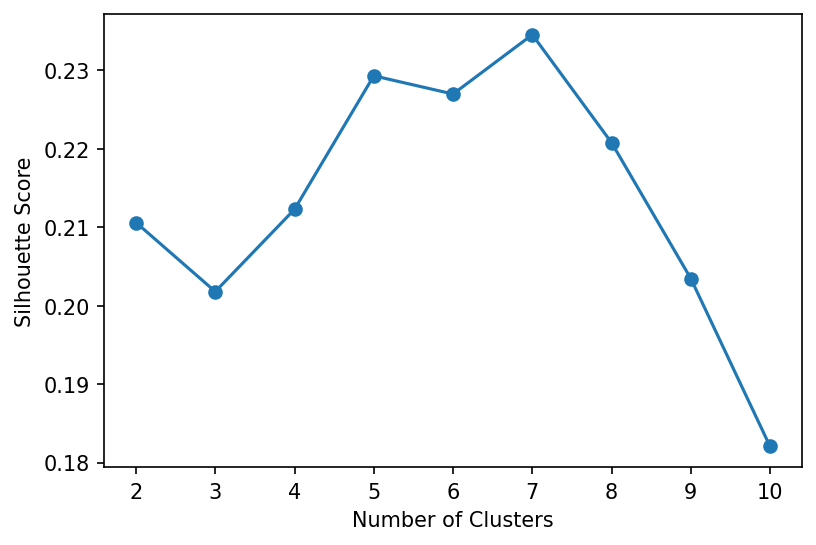

In [11]:
k_array = np.arange(2,11)
inertia_list = []
silhouette_list = []

for k in k_array:
    km = KMeans(n_clusters = k, n_init = 5, init="k-means++")
    km.fit(df_scaled)
    inertia_list.append(km.inertia_)
    sil_score = silhouette_score(df_scaled, km.labels_)
    silhouette_list.append(sil_score)

plt.figure(dpi = 150)
plt.plot(k_array, inertia_list, marker ="o")

plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

plt.figure(dpi = 150)
plt.plot(k_array, silhouette_list, marker ="o")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

### Inertias and silhouette scores are considered when deciding which k-value is best. The inertia graph is likened to an elbow shape and the point where it turns horizontal after a sudden decrease gives the best k value. However, looking at this graph, we cannot decide exactly what the k value will be. Therefore, it is necessary to look at the silhouette score chart. However, the obtained silhouette score is not good enough. When the code is run several times, scores of 0.230 and below are usually obtained, while scores above 0.230 are obtained in this iteration, the value of k is 7.

# 3) Reruning with k = 7 and printing cluster centers

In [12]:
km = KMeans(n_clusters = 7, n_init = 5, init="k-means++")
km.fit(df_scaled)

KMeans(n_clusters=7, n_init=5)

In [13]:
df_centers = pd.DataFrame(km.cluster_centers_, columns = df_scaled.columns)
df_centers

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,9.908022e-01,0.435980,0.472151,0.431954,0.670720,0.032873,0.535989,0.591518,0.380940,0.410322,...,0.308684,0.233667,0.217218,0.403291,0.198133,0.233906,1.776357e-15,-1.526557e-16,1.000000e+00,-3.885781e-16
1,8.366534e-01,0.443700,0.497211,0.428730,0.763347,0.147410,0.548689,0.507304,0.387782,0.420761,...,0.793396,0.222760,0.276298,0.458734,0.190803,0.041879,4.249668e-02,6.241700e-02,-1.110223e-16,7.543161e-01
2,1.000000e+00,0.444584,0.468203,0.438256,0.198890,0.013658,0.541077,0.581050,0.376867,0.380068,...,0.101506,0.229400,0.220970,0.456021,0.203292,0.382580,1.000000e+00,-1.526557e-16,8.702518e-01,-1.165734e-15
3,8.214286e-01,0.428004,0.456857,0.424762,0.200381,0.019206,0.528272,0.555810,0.395000,0.408810,...,0.108930,0.219149,0.219136,0.452927,0.191152,0.336243,1.000000e+00,-1.249001e-16,-2.942091e-15,1.000000e+00
4,8.416548e-01,0.404286,0.471327,0.439372,0.378031,0.019020,0.513685,0.576034,0.388968,0.400143,...,0.189950,0.222778,0.224813,0.443707,0.189623,0.272087,5.734665e-01,1.000000e+00,4.440892e-16,5.551115e-17
5,8.881784e-16,0.434817,0.510474,0.447215,0.388279,0.017456,0.533956,0.463591,0.447423,0.489817,...,0.175058,0.201484,0.128837,0.254615,0.146602,0.167228,5.997506e-01,-9.714451e-17,8.615960e-01,-4.440892e-16
6,8.653977e-01,0.421265,0.446907,0.433719,0.594018,0.004985,0.525066,0.579742,0.387492,0.409245,...,0.169342,0.220956,0.218925,0.433113,0.191958,0.251529,1.554312e-15,-1.249001e-16,-1.221245e-15,8.667573e-01


# 4) Identifying 2 clusters

In [16]:
inverse_transformed = scaler.inverse_transform(df_centers)
pd.set_option("max_columns", None)
pd.DataFrame(inverse_transformed, columns=df_centers.columns)

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,9.908022e-01,46.491058,2.360756,2.591722,3.353602,0.098620,36.047522,3.957588,2.285641,2.461932,11998.310373,1341.682678,10656.627695,0.793765,4414.277976,62.024527,0.735867,0.233672,1.776357e-15,-1.526557e-16,1.000000e+00,-3.885781e-16
1,8.366534e-01,46.853918,2.486056,2.572377,3.816733,0.442231,36.593625,3.536521,2.326693,2.524568,28533.086321,1147.620186,27385.466135,0.756714,5476.172643,69.176627,0.708643,0.041837,4.249668e-02,6.241700e-02,-1.110223e-16,7.543161e-01
2,1.000000e+00,46.895433,2.341016,2.629535,0.994452,0.040973,36.266325,3.905250,2.261204,2.280410,4756.961289,1250.697397,3506.263892,0.779273,4481.710201,68.826718,0.755026,0.382198,1.000000e+00,-1.526557e-16,8.702518e-01,-1.165734e-15
3,8.214286e-01,46.116190,2.284286,2.548571,1.001905,0.057619,35.715714,3.779048,2.370000,2.452857,4877.467190,1114.966667,3762.500524,0.744448,4448.743810,68.427619,0.709938,0.335907,1.000000e+00,-1.249001e-16,-2.942091e-15,1.000000e+00
4,8.416548e-01,45.001427,2.356633,2.636234,1.890157,0.057061,35.088445,3.880171,2.333809,2.400856,7712.099429,1153.342368,6558.757061,0.756776,4550.797432,67.238231,0.704260,0.271815,5.734665e-01,1.000000e+00,4.440892e-16,5.551115e-17
5,8.881784e-16,46.436409,2.552369,2.683292,1.941397,0.052369,35.960100,3.317955,2.684539,2.938903,6680.674439,635.886534,6044.787905,0.684441,2825.718204,42.845387,0.544481,0.167061,5.997506e-01,-9.714451e-17,8.615960e-01,-4.440892e-16
6,8.653977e-01,45.799456,2.234534,2.602311,2.970088,0.014956,35.577838,3.898708,2.324949,2.455472,7000.247247,1152.752549,5847.494697,0.750587,4444.961251,65.871516,0.712931,0.251277,1.554312e-15,-1.249001e-16,-1.221245e-15,8.667573e-01


### 4.a)  The cluster with the highest attrition flag is the cluster with index number 2. And it's value is 1 which means s/he is an existing customer. Average customer age is 46.895433. Education_Level is 2.629535 which it is near to 3, so education level is college. Income_Category is 0.994452 which corresponds to less than 40K dollars and which corresponds to the lowest income. Average remaining limit (Avg_Open_To_Buy) is 3506.263892. Total transaction amount (Total_Trans_Amt) in the last 12 months is 4481.710201. Total number of transactions (Total_Trans_Ct) in the last 12 months is 68.826718. Average card utilization ratio is 0.382198. All of the customers in this cluster are women, and the vast majority are married.

### 4.b) The cluster with the lowest attrition flag is the cluster with index number 5. And it's value is near to 0 which means s/he is an attrited customer. Average customer age is 46.436409. Education_Level is 2.683292 which it is near to 3, so education level is college. Income_Category is 1.941397 which corresponds to 40K-60K dollars. Average remaining limit (Avg_Open_To_Buy) is 6044.787905. Total transaction amount (Total_Trans_Amt) in the last 12 months is 2825.718204. Total number of transactions (Total_Trans_Ct) in the last 12 months is 42.845387. Average card utilization ratio is 0.167061. Almost %60 of the customers in this cluster are women, and the vast majority are married.

# 5) Explanations

### All 6 of the 7 clusters have a center point above 0.8 in the Attrition_Flag column, which is close to 1, so it can be said that most of them are existing customers. There are attrited customers in the cluster whose center point is close to 0. Since customers with low attrition flags are less loyal to the bank, customers in cluster 5 index are less loyal, and the rest are more loyal. Card_Category has not changed much and the majority of customers have a blue card. Generally, people with higher incomes have higher credit limits. Therefore, the credit limits of clusters with different incomes will also be different. Avg_Open_To_Buy column also differs according to income levels. In this column, which shows the remaining usable limit, it is seen that people with high income have a lot of remaining limits. However, looking at the Credit_Limit column, it appears that for each cluster, AVG_Open_To_Buy hasn't changed much and customers haven't had much usage (between 636 and 1342). Average card utilization ratio also varies.